# Steps to scrap a website using Scrapy

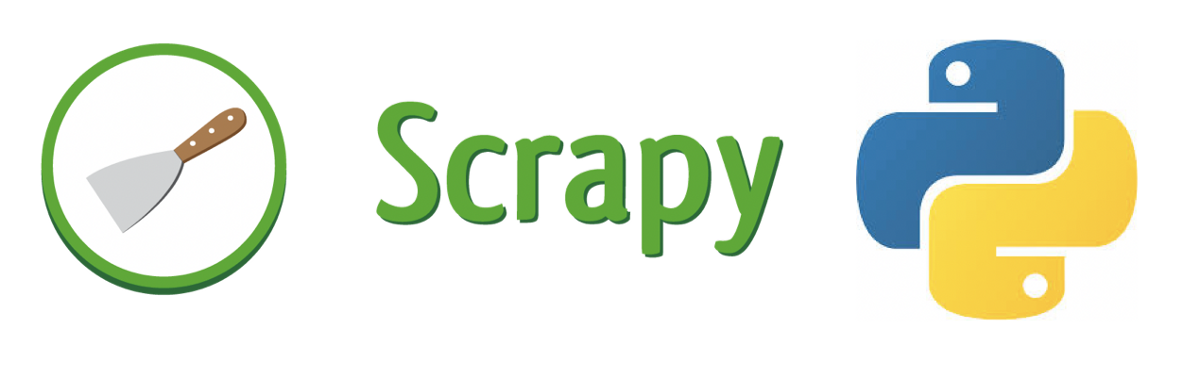

- Scrapy is an open source and collaborative framework for extracting the data from websites 

## 1 - Install Scrapy

Using the command


- pip install scrapy



## 2 - Create a project  

We create a project named Project_test: 

- scrapy startproject Project_test

## 3 - Change the repository : 

- cd Project_test

## 4 - Generate new spider using pre-defined templates

We generate a spider named test : 
- scrapy genspider test x 

## 5 - Open the genspider file : 

We open the file test.py in spiders folder : 

In [ ]:
import scrapy


class TestSpider(scrapy.Spider):
    name = 'test'
    allowed_domains = ['x']
    start_urls = ['http://x/']

    def parse(self, response):
        pass

In our example we want to get all files from "https://www.hud.gov/program_offices/housing/rmra/oe/rpts/sfsnap/sfsnap/" website.

We change the code by : 

In [ ]:
class TestSpider(scrapy.Spider):
    name = "test"
    # The URL we want to scrap
    start_urls = [
        "https://www.hud.gov/program_offices/housing/rmra/oe/rpts/sfsnap/sfsnap/"
    ]

    def parse(self, response):
        """
        This function parse all elements on the website we want to scrap based 
        on their xpath and then get their names and files. In our case, we used
        xpath to select files but we could also identify them from their css path
        """
        for file in response.xpath(
            "/html/body/div[3]/div/section/div/section[3]/div/div[1]/div/div/div/div/div/div/div/div/div[2]/ul[2]/li | /html/body/div[3]/div/section/div/section[3]/div/div[1]/div/div/div/div/div/div/div/div/div[2]/ul[3]/li"
        ):
            try:
                yield {
                    "name": file.css("li ::text").get(),
                    "file_urls": [response.urljoin(file.css("a ::attr(href)").get())],
                }
            except:
                yield {"name": "File not Found"}

## 6 - Modify items.py 

Once the test.py file modified, we open items.py and then 
modify the fields of our item : 

- name : is the name of our file
- file_urls : is the list of links
- files : are the files downloaded

We replace the following code : 

In [ ]:
# Define here the models for your scraped items
#
# See documentation in:
# https://docs.scrapy.org/en/latest/topics/items.html

import scrapy


class ProjectTestItem(scrapy.Item):
    # define the fields for your item here like:
    # name = scrapy.Field()
    pass

by : 

In [ ]:
# Define here the models for your scraped items
#
# See documentation in:
# https://docs.scrapy.org/en/latest/topics/items.html

import scrapy


class ProjectTestItem(scrapy.Item):
    # define the fields for your item here like:
    name = scrapy.Field()
    file_urls = scrapy.Field()
    files = scrapy.Field()

## 7 - open pipeline.py file 

Add a function that process the files, example return the name of a file from the url.

We change the following code : 

In [ ]:
# Define your item pipelines here
#
# Don't forget to add your pipeline to the ITEM_PIPELINES setting
# See: https://docs.scrapy.org/en/latest/topics/item-pipeline.html


# useful for handling different item types with a single interface
from itemadapter import ItemAdapter


class ProjectTestPipeline:
    def process_item(self, item, spider):
        return item

by : 

In [ ]:
from scrapy.pipelines.files import FilesPipeline


class ProjectTestPipeline(FilesPipeline):
    def file_path(self, request, response=None, info=None, *, item=None):
        return(item.get('name').strip() + "." 
               + str(item.get('file_urls')[0].split('.')[-1]).strip())
        #return (item.get('name'))

## 8 - Open the settings.py file

Add those lines : 
    
    
- Add this line to get the name of each file :

ITEM_PIPELINES = {'Project_test.pipelines.ProjectTestPipeline': 1}


- Allows to redirect urls : 

MEDIA_ALLOW_REDIRECTS = True


- The folder's name where we'll store our file : 

FILES_STORE = 'downloaded_files'

## 9 - Lauch web scrapping 

Open a terminal and type : 
- scrapy crawl Barclays 

we can also use scrapy crawl Barclays  --nolog , if we won't see the logs

# Result

Files are downloaded and stored in downloaded_files folder :

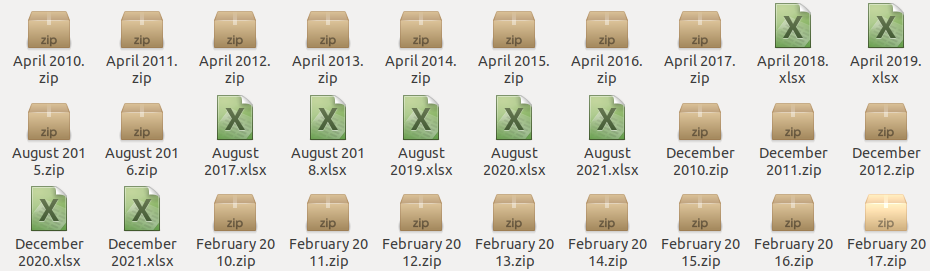